In [56]:
import numpy as np
import pandas as pd
from time import time,sleep
from random import randint as r
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [57]:
# reward = pd.read_csv('maze.csv')
# reward_array = np.array(reward)
reward = pd.read_excel('maze_reward_table.xlsx', sheet_name="Sheet2", header=None)
# reward.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# reward.index = [1,2,3,4,5,6,7,8,9,10]
reward = np.array(reward)
terminals = [17,28,32,43,47,58,73,75,76,77,78,79,80,81,82,88,96,103,111,129,130,131,132,133,134]
# terminals = [16,28,31,43,46,58,73,75,76,77,78,79,80,81,82,88,96,103,111,129,130,131,132,133,134]
actions = {"up": 0,"down" : 1,"left" : 2,"right" : 3}

In [58]:
def select_action(current_state, current_pos, epsilon, Q):
    possible_actions = []
    
    if np.random.uniform() <= epsilon:
        if current_pos[0] != 0:
            possible_actions.append("up")
        if current_pos[0] != ny-1:
            possible_actions.append("down")
        if current_pos[1] != 0:
            possible_actions.append("left")
        if current_pos[1] != nx-1:
            possible_actions.append("right")
        action = actions[possible_actions[r(0,len(possible_actions)-1)]]
    else:
        m = np.min(Q[:,current_state])
        if current_pos[0] != 0: #up
            possible_actions.append(Q[0,current_state])
        else:
            possible_actions.append(m - 100)
        if current_pos[0] != ny-1: #down
            possible_actions.append(Q[1,current_state])
        else:
            possible_actions.append(m - 100)
        if current_pos[1] != 0: #left
            possible_actions.append(Q[2,current_state])
        else:
            possible_actions.append(m - 100)
        if current_pos[1] != nx-1: #right
            possible_actions.append(Q[3,current_state])
        else:
            possible_actions.append(m - 100)
#         action = random.choice([i for i,a in enumerate(possible_actions) if a == max(possible_actions)]) #randomly selecting one of all possible actions with maximin value
        action = random.choice([i for i,a in enumerate(possible_actions) if a == max(possible_actions)]) #randomly selecting one of all possible actions with maximin value
    return action

In [59]:
def episode(epsilon, gamma, eta, current_pos, current_state, Q):
    win_state = 147
    win_flag = 0
    current_pos_temp = current_pos.copy()
    test = []
    current_state = states[(current_pos[0],current_pos[1])]
    action = select_action(current_state, current_pos, epsilon, Q)
    if action == 0: #move up
        current_pos[0] -= 1
    elif action == 1: #move down
        current_pos[0] += 1
    elif action == 2: #move left
        current_pos[1] -= 1
    elif action == 3: #move right
        current_pos[1] += 1
    new_state = states[(current_pos[0],current_pos[1])]
    action2 = select_action(new_state, current_pos, epsilon, Q)  
    if new_state not in terminals:
              
        Q[action, current_state] = Q[action, current_state] + eta*(reward[current_pos[0],current_pos[1]] + gamma*(Q[action2,new_state]) - Q[action,current_state])
        if new_state == win_state: win_flag = 1
            
    else:
        current_pos = current_pos_temp
        new_state = states[(current_pos[0],current_pos[1])]
        Q[action, current_state] += eta*(reward[current_pos[0],current_pos[1]] + gamma*(Q[action,new_state]) - Q[action,current_state])
        
        
    return win_flag, new_state, current_pos

In [60]:
nx = 15
ny = 10
epsilon = 0.1 # Epsilon
eta = 0.1 # Learning Rate
gamma = 0.95 
Q = np.zeros((4,150)) # inititalise q table
current_pos = [0,0]
current_state = 0
actions = {"up": 0,"down" : 1,"left" : 2,"right" : 3}
states = {}
k=0
for i in range(ny):
    for j in range(nx):
        states[(i,j)] = k
        k+=1

run = True
counter = 0
iteration = 0
state_history = []
train_history = []
start = time.time()
while run:
#     start= time.time()

    train_counter = 0
    episode_flag = True
    while episode_flag:
        win_flag, new_state, pos = episode(epsilon, gamma, eta, current_pos, current_state, Q)
        if (win_flag == 1): episode_flag = False
        train_counter += 1
        if current_state == 147: print('147 reached')
    train_history.append(train_counter)
    current_pos = [0,0]
    counter += 1

    if (counter/1000) in ([1,2,3,4,5,6,7,8,9]): 
        end=time.time()
        print('Episode ',counter,' time = ', round(end-start,2), 'sec')
        start = end
    if (counter == 10000): run = False

Episode  1000  time =  0.81 sec
Episode  2000  time =  0.52 sec
Episode  3000  time =  0.54 sec
Episode  4000  time =  0.51 sec
Episode  5000  time =  0.51 sec
Episode  6000  time =  0.47 sec
Episode  7000  time =  0.48 sec
Episode  8000  time =  0.54 sec
Episode  9000  time =  0.49 sec


In [61]:
episodes = list(range(len(train_history)))
data = pd.DataFrame(episodes)
data['train'] = train_history

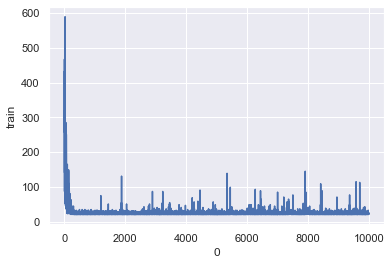

In [62]:
ax = sns.lineplot(x=0, y='train', data=data)

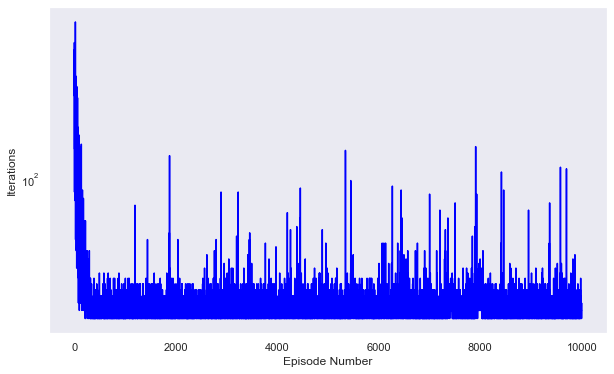

In [63]:
# sns.set()
plt.figure(figsize=(10, 6))

ax = sns.lineplot(x=0, y='train', data=data, color = 'blue')
ax.set(xlabel='Episode Number', ylabel='Iterations')
ax.set(yscale="log")
ax.grid(False)

plt.savefig('Q-learning 2 cam.png',bbox_inches = 'tight');

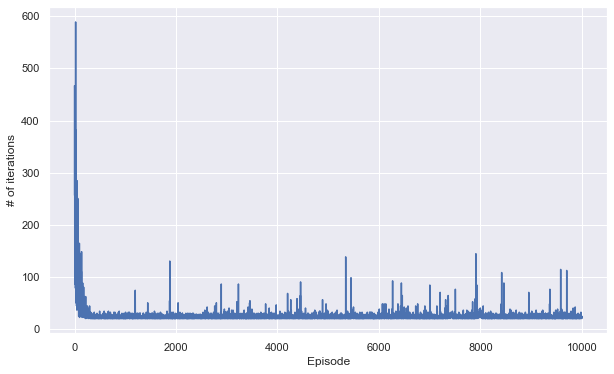

In [64]:
sns.set()
plt.figure(figsize=(10, 6))

ax = sns.lineplot(x=0, y='train', data=data)
ax.set(xlabel='Episode', ylabel='# of iterations')
# ax.set(yscale="log")
# ax.grid(False)

plt.savefig('Q-learning 2 chris.png',bbox_inches = 'tight');

In [65]:
data[9600:10000].mean()

0        9799.500
train      24.265
dtype: float64

In [66]:
current_pos = [0,0]
current_state = 0
state_history=[current_state]

def test_greedy(epsilon, gamma, eta, current_pos, Q):  
    win_state = 147
    win_flag = 0
    current_pos_temp = current_pos.copy()
    current_state = states[(current_pos[0],current_pos[1])]
    action = select_action(current_state, current_pos, epsilon, Q)
    if action == 0: #move up
        current_pos[0] -= 1
    elif action == 1: #move down
        current_pos[0] += 1
    elif action == 2: #move left
        current_pos[1] -= 1
    elif action == 3: #move right
        current_pos[1] += 1
    new_state = states[(current_pos[0],current_pos[1])]
    if new_state == win_state:
        win_flag = 1
            
    elif new_state in terminals:
        current_pos = current_pos_temp.copy()
        new_state = states[(current_pos[0],current_pos[1])]
    
    return win_flag, new_state, current_pos
    
    
train_counter = 0
episode_flag = True
epsilon = 0

while episode_flag:
    win_flag, new_state, pos = test_greedy(epsilon, gamma, eta, current_pos, Q)
    current_pos = pos
    state_history.append(new_state)
    if (win_flag == 1): episode_flag = False
    train_counter += 1
    if (train_counter == 1000): episode_flag = False


In [67]:
state_history

[0,
 1,
 2,
 3,
 4,
 5,
 20,
 35,
 50,
 51,
 52,
 53,
 68,
 83,
 98,
 113,
 128,
 143,
 144,
 145,
 146,
 147]

In [68]:
pd.DataFrame(Q)[state_history].to_csv('2_chris.csv')

,0,15,30,45,60,61,62,63,64,65,...,68,83,98,113,128,143,144,145,146,147
0,0.000000,0.037273,0.050787,0.064270,0.081485,0.062587,-0.157289,0.115275,0.183179,0.196133,...,0.343632,0.411473,0.420918,0.490756,0.539251,0.606793,-0.171399,-0.168698,-0.162882,0.0
1,0.063857,0.076966,0.086917,0.118285,-0.128783,-0.154641,-0.158346,-0.158137,-0.158346,-0.158555,...,0.467277,0.505389,0.559756,0.622960,0.682188,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.093418,0.124480,0.116047,0.149675,0.205466,...,0.353579,-0.144571,0.450163,0.488243,0.513467,0.547045,0.651808,0.721645,0.775590,0.0
3,0.012027,0.021252,0.023171,0.058600,0.147607,0.175959,0.160445,0.211831,0.287511,0.318276,...,0.330090,0.418333,0.424188,0.441433,-0.149606,0.727701,0.808801,0.923593,1.000000,0.0
